In [1]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style('whitegrid')

In [2]:
# Read in the data

df= pd.read_csv('https://raw.githubusercontent.com/brisamh/modeling_clv/refs/heads/main/data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv') 
                


In [3]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [5]:
df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [41]:
df.duplicated().sum()

0

In [7]:
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'])

/var/folders/9v/5yh40h_55xv50xhdsn75mt000000gn/T/ipykernel_93470/1058590742.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Effective To Date'] = pd.to_datetime(df['Effective To Date'])


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       9134 non-null   object        
 1   State                          9134 non-null   object        
 2   Customer Lifetime Value        9134 non-null   float64       
 3   Response                       9134 non-null   object        
 4   Coverage                       9134 non-null   object        
 5   Education                      9134 non-null   object        
 6   Effective To Date              9134 non-null   datetime64[ns]
 7   EmploymentStatus               9134 non-null   object        
 8   Gender                         9134 non-null   object        
 9   Income                         9134 non-null   int64         
 10  Location Code                  9134 non-null   object        
 11  Marital Status   

In [11]:
numeric_cols = ['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount'
]

In [72]:
categorical_cols = [
 'Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size'
]

In [12]:
predictor_variables= ['Education','EmploymentStatus','Marital Status','Income','Coverage']

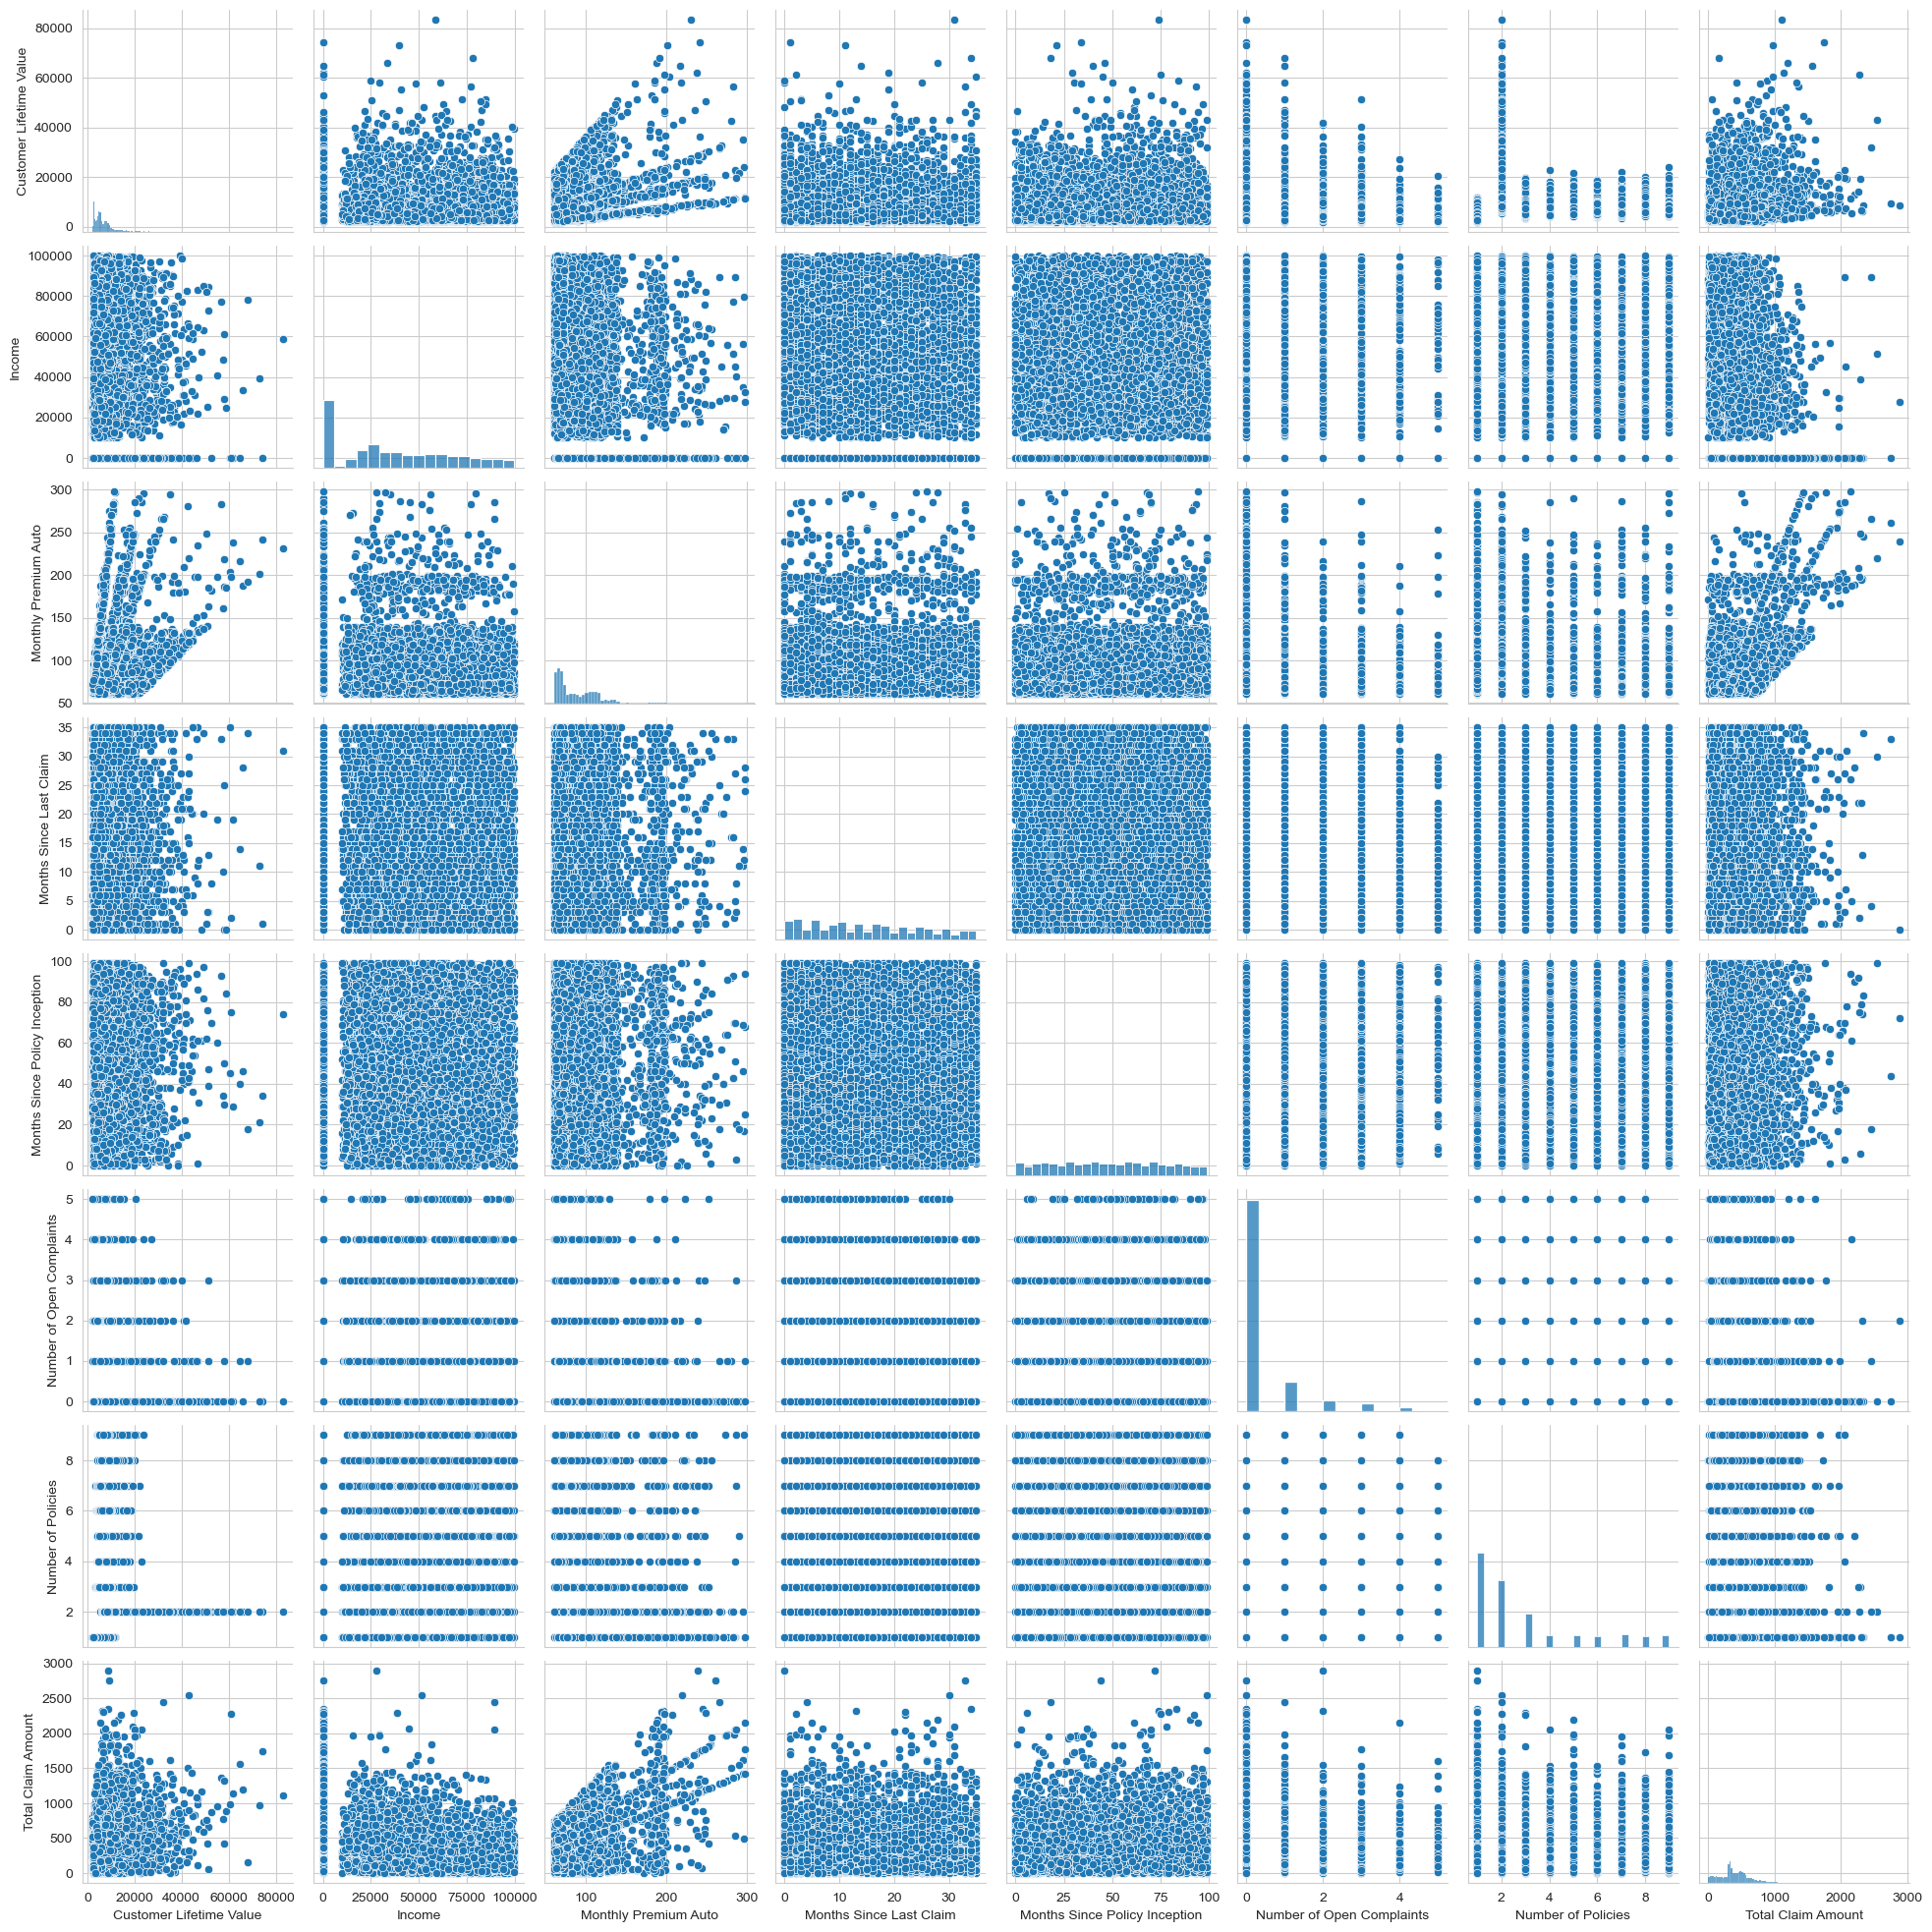

In [45]:
sns.pairplot(df[numeric_cols])
plt.show()

In [46]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.describe().round(2)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00
mean,8004.94,37657.38,93.22,15.10,48.06,0.38,2.97,434.09
std,6870.97,30379.90,34.41,10.07,27.91,0.91,2.39,290.50
min,1898.01,0.00,61.00,0.00,0.00,0.00,1.00,0.10
25%,3994.25,0.00,68.00,6.00,24.00,0.00,1.00,272.26
50%,5780.18,33889.50,83.00,14.00,48.00,0.00,2.00,383.95
75%,8962.17,62320.00,109.00,23.00,71.00,0.00,4.00,547.51
max,83325.38,99981.00,298.00,35.00,99.00,5.00,9.00,2893.24


In [47]:
df.select_dtypes(include=['number']).agg(['min', 'max']).round(2)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
min,1898.01,0,61,0,0,0,1,0.10
max,83325.38,99981,298,35,99,5,9,2893.24


In [48]:
df['EmploymentStatus'].value_counts()

EmploymentStatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: count, dtype: int64

In [49]:
df['Education'].value_counts()

Education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64

In [50]:
df['Gender'].value_counts()

Gender
F    4658
M    4476
Name: count, dtype: int64

In [51]:
df['Marital Status'].value_counts()

Marital Status
Married     5298
Single      2467
Divorced    1369
Name: count, dtype: int64

In [52]:
df['Coverage'].value_counts()

Coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64

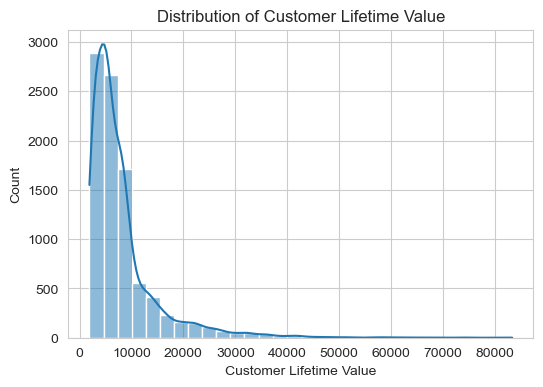

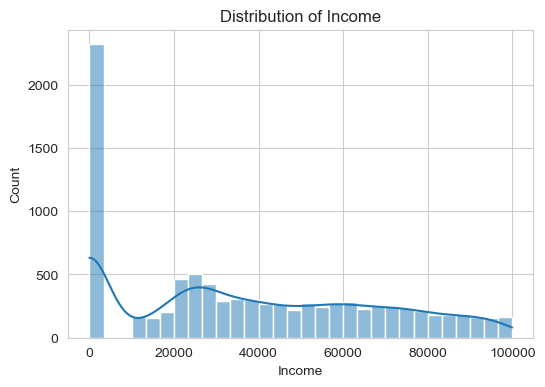

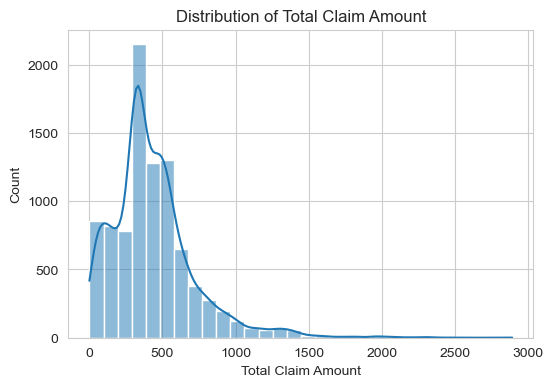

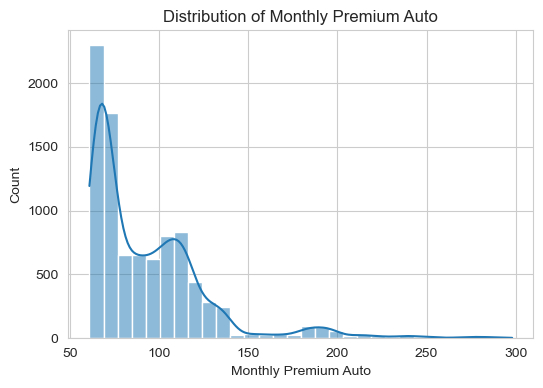

In [19]:
num_cols = ['Customer Lifetime Value', 'Income', 'Total Claim Amount', 'Monthly Premium Auto']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

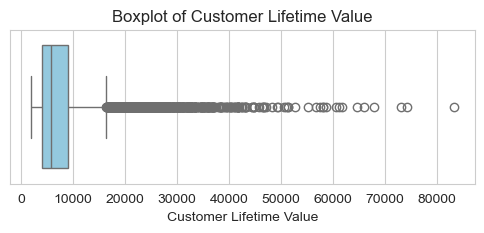

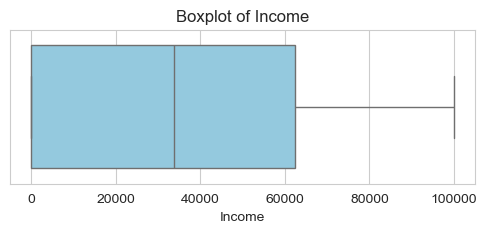

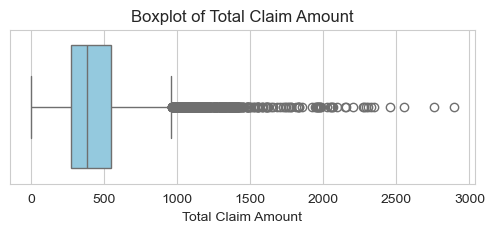

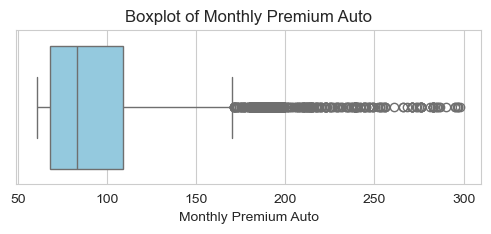

In [ ]:
# Box plot to detect outliers

for col in num_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.show()

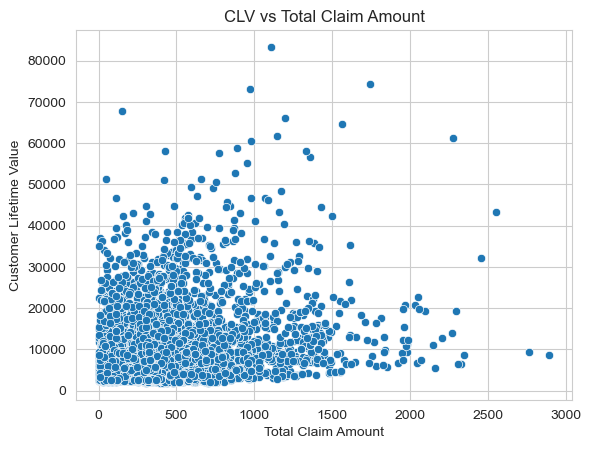

In [60]:
sns.scatterplot(x='Total Claim Amount', y='Customer Lifetime Value', data=df)
plt.title('CLV vs Total Claim Amount')
plt.show()

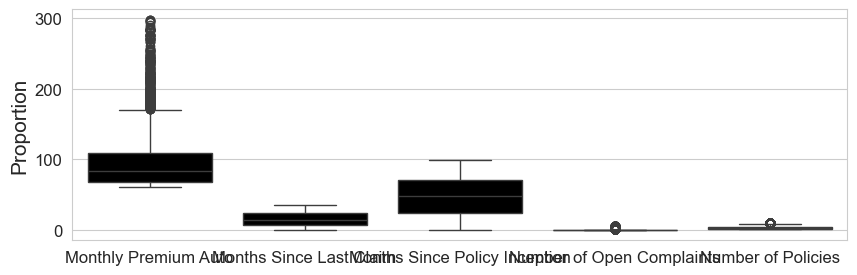

In [71]:
plt.figure(figsize=(10, 3))

fractions = list(numeric_cols)
fractions = [col for col in numeric_cols if col not in ['Customer Lifetime Value', 'Income','Total Claim Amount']]

sns.boxplot(data=df[fractions], color='k')

plt.ylabel('Proportion', fontsize=15)
plt.tick_params(labelsize=12)
plt.show()

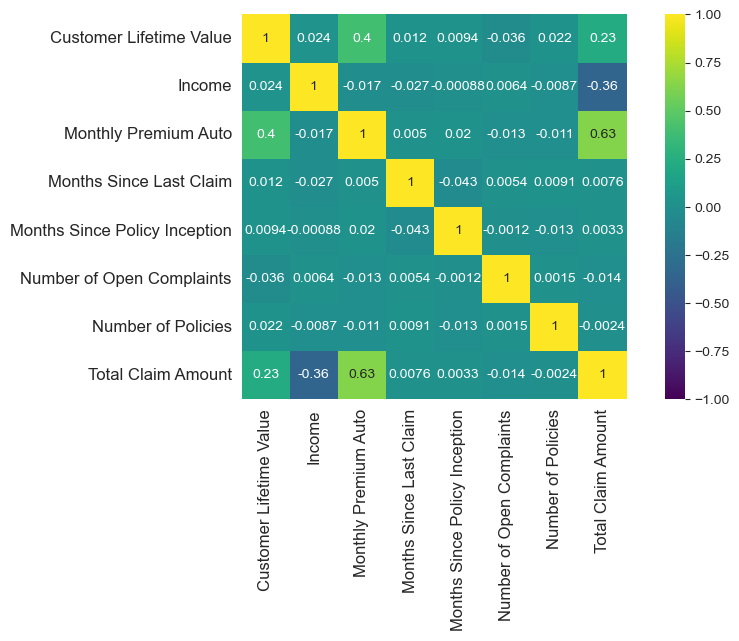

In [16]:

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(
    corr_matrix,
    vmax=1, vmin=-1,
    square=True,
    annot=True,
    cmap="viridis"
)
plt.tick_params(labelsize=12)
plt.show()


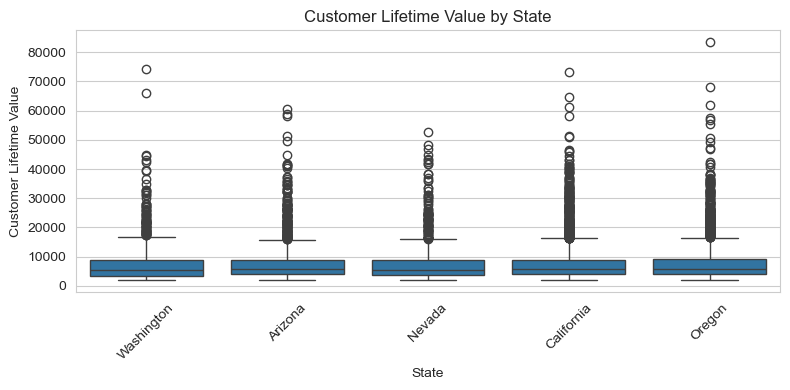

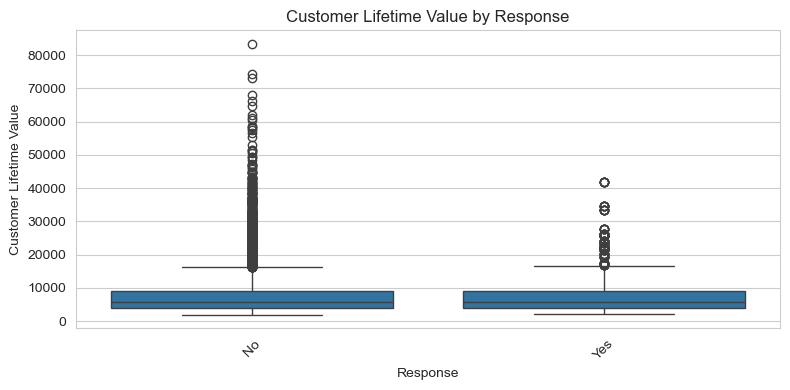

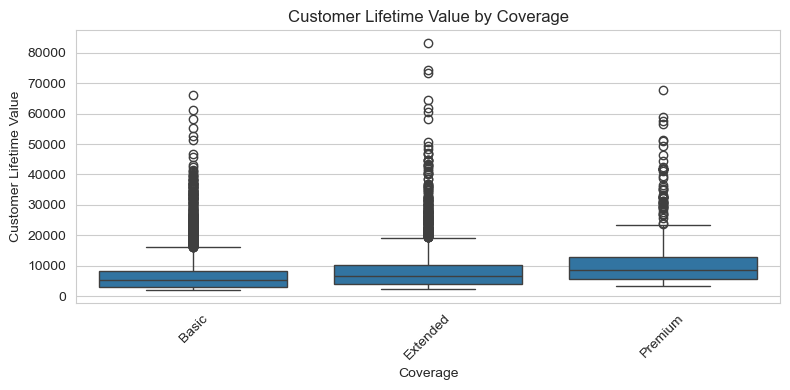

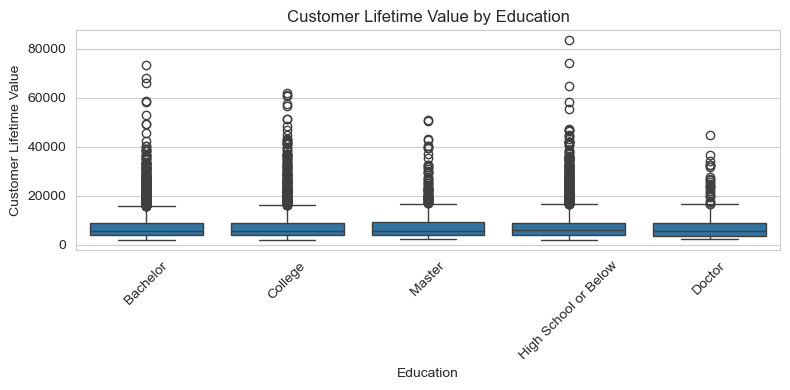

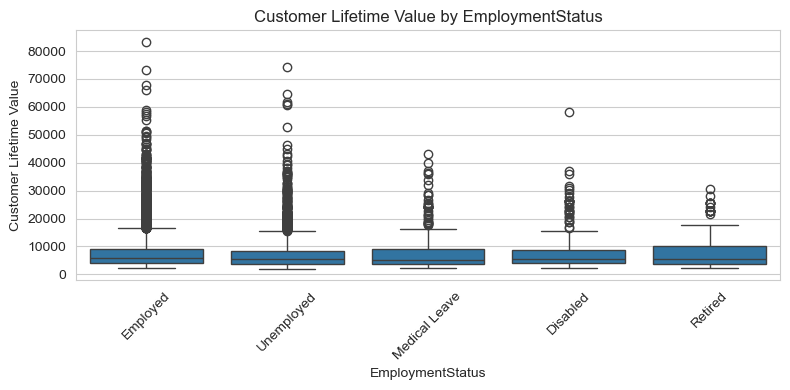

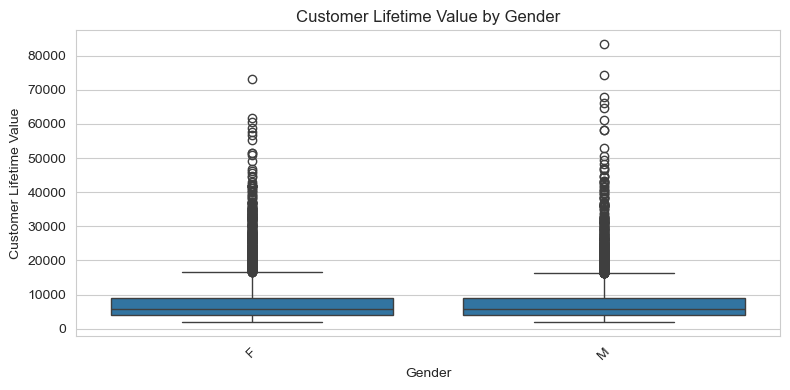

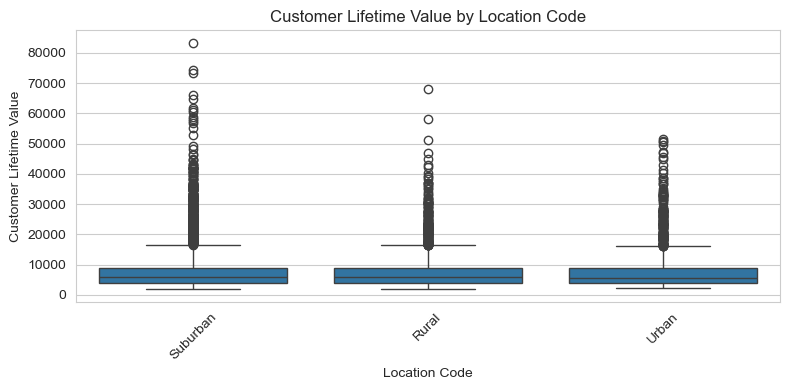

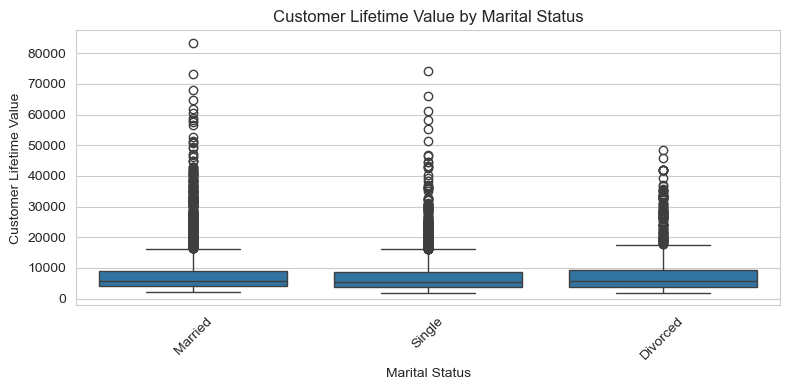

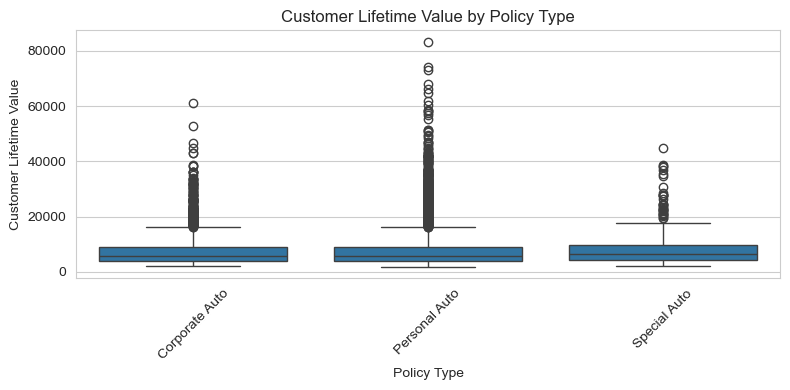

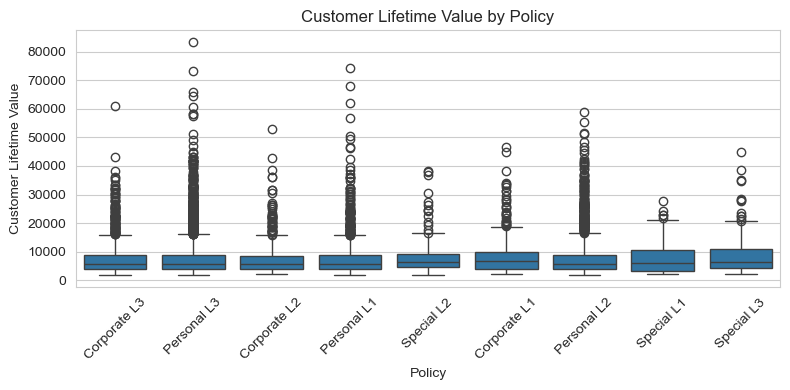

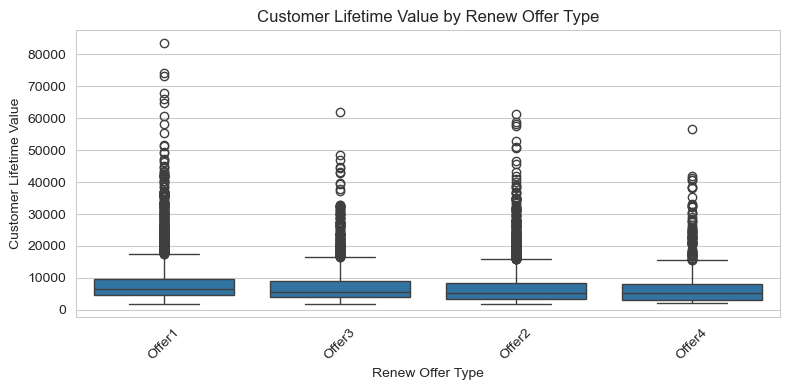

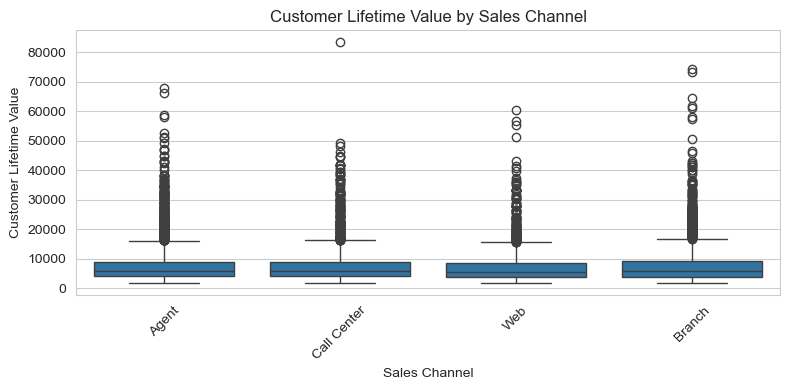

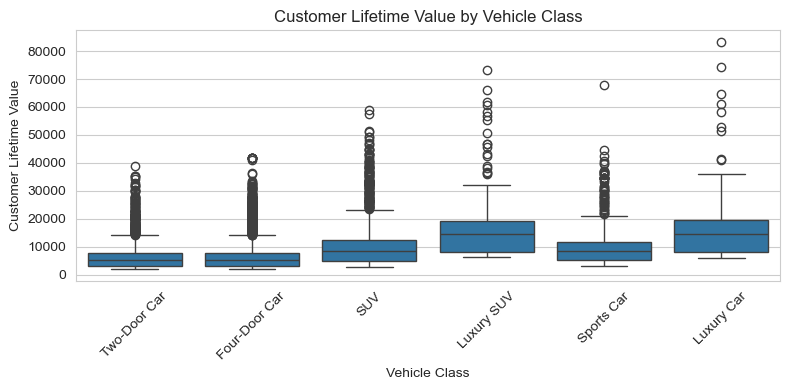

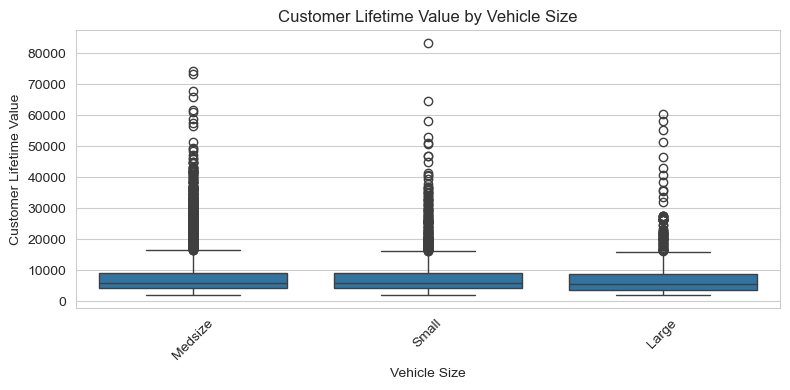

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select categorical columns automatically
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Remove ID/date columns that don’t make sense to compare
categorical_cols = [col for col in categorical_cols if col not in ['Customer', 'Effective To Date']]

# Create one plot per categorical column
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col, y='Customer Lifetime Value')
    plt.title(f'Customer Lifetime Value by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

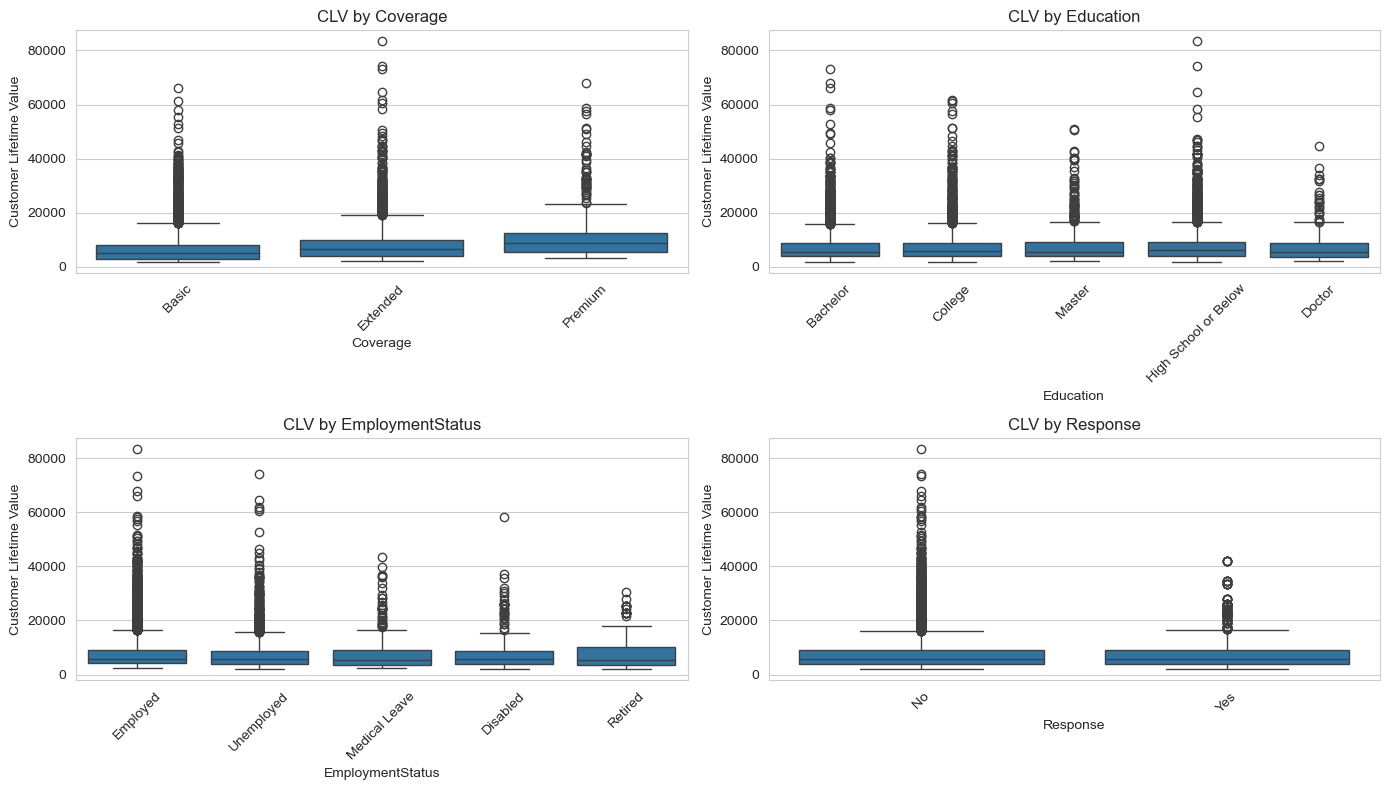

In [18]:
cat_vars = ['Coverage', 'Education', 'EmploymentStatus', 'Response']

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
for ax, col in zip(axes.flatten(), cat_vars):
    sns.boxplot(data=df, x=col, y='Customer Lifetime Value', ax=ax)
    ax.set_title(f'CLV by {col}')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [21]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols = [c for c in cat_cols if c not in ['Customer', 'Effective To Date']]
corrs = {}
for col in cat_cols:
    if 2 <= df[col].nunique() <= 25:  # avoid too many unique levels
        means = df.groupby(col)["Customer Lifetime Value"].mean()
        df[f"{col}_enc"] = df[col].map(means)
        corrs[col] = df["Customer Lifetime Value"].corr(df[f"{col}_enc"])

corr_df = pd.DataFrame.from_dict(corrs, orient="index", columns=["Correlation"]).sort_values("Correlation", ascending=False)
corr_df

,Correlation
Vehicle Class,0.357293
Coverage,0.168661
Renew Offer Type,0.091743
EmploymentStatus,0.040823
Education,0.032565
Policy,0.032202
Marital Status,0.026947
Vehicle Size,0.022838
Policy Type,0.021865
Sales Channel,0.017007


In [24]:
# Select categorical columns
cat_cols = df.select_dtypes(include='object').columns
cat_cols = [c for c in cat_cols if c not in ['Customer', 'Effective To Date']]  # exclude IDs/dates

# Create an empty list to store results
summary_list = []

for col in cat_cols:
    summary = (
        df.groupby(col)['Customer Lifetime Value']
          .agg(['mean', 'median', 'count'])
          .reset_index()
          .rename(columns={col: 'Category'})
    )
    summary['Variable'] = col  # add the variable name for clarity
    summary_list.append(summary)

# Combine all summaries into one dataframe
summary_df = pd.concat(summary_list, ignore_index=True)
summary_df = summary_df[['Variable', 'Category', 'mean', 'median', 'count']]

# Sort by variable name or mean CLV
summary_df.sort_values(['Variable', 'mean'], ascending=[True, False], inplace=True)
summary_df.head(20)

,Variable,Category,mean,median,count
9,Coverage,Premium,10895.603083,8717.814857,824
8,Coverage,Extended,8789.677608,6627.161778,2742
7,Coverage,Basic,7190.706422,5296.995144,5568
13,Education,High School or Below,8296.709033,6130.478049,2622
14,Education,Master,8243.484692,5718.276608,741
10,Education,Bachelor,7872.660412,5642.053579,2748
11,Education,College,7851.064644,5792.439588,2681
12,Education,Doctor,7520.344837,5494.192881,342
16,EmploymentStatus,Employed,8219.117754,5863.592560,5698
15,EmploymentStatus,Disabled,7847.889354,5623.314472,405
